# Vaccine Discourse Analysis
## **Table of Contents**
1. Set Up
2. Data Preprocessing   
    2.1 Processing the initial dataset   
    2.2 Cleaning the tweets
3. Tasks     
    Task 1: Investigate the effectiveness of social media as an indicator for on-the-ground events    
    Task 2: Examine the correlation between the emotional intensity of tweets and their virality


### **1. Set Up** 

Import the necessary packages

In [3]:
import pandas as pd
import re       
import seaborn as sns     
import matplotlib.pyplot as plt   
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Read the CSV file

In [4]:
df = pd.read_csv('TweetsAboutCovid-19.csv')
df.head()

C:\Users\tanka\AppData\Local\Temp\ipykernel_9144\3422053528.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TweetsAboutCovid-19.csv')


,id,created_at,date,time,timezone,place,tweet,language,replies_count,retweets_count,likes_count,hashtags,cashtags,retweet,video,thumbnail
0,1.385880e+18,2021-04-24 08:43:17 UTC,4/24/2021,8:43:17,0,NaN,🇨🇺: ✍️ Covid-19 en Cuba: 1241 nuevos casos pos...,es,0.0,0.0,0.0,"['reportando', 'cuba']",[],False,0.0,NaN
1,1.385880e+18,2021-04-24 08:43:17 UTC,4/24/2021,8:43:17,0,NaN,The latest The Zika Advice Paper! https://t.c...,en,0.0,0.0,0.0,"['covid19', 'amr']",[],False,0.0,NaN
2,1.385880e+18,2021-04-24 08:43:16 UTC,4/24/2021,8:43:16,0,NaN,Tum karo toh mantra ..woh kare toh tantra ..ai...,tl,0.0,0.0,0.0,"['covidindia', 'covidvaccine', 'covidresources...",[],False,1.0,https://pbs.twimg.com/media/EzufwnkUYA0TExx.jpg
3,1.385880e+18,2021-04-24 08:43:16 UTC,4/24/2021,8:43:16,0,NaN,https://t.co/4rdhSH3IYl Prime Minister @Nare...,en,0.0,0.0,0.0,['covid_19'],[],False,1.0,https://pbs.twimg.com/media/EzueSRxVgAEiTie.jpg
4,1.385880e+18,2021-04-24 08:43:16 UTC,4/24/2021,8:43:16,0,NaN,@bc_pt64 @KackCake @sherlockine1 @SternchenJvB...,de,0.0,0.0,0.0,[],[],False,0.0,NaN


Understanding the initial dataset by looking at the column names, the types of the columns, and how many null entries are in each column.

In [5]:
df.dtypes

id                float64
created_at         object
date               object
time               object
timezone            int64
place              object
tweet              object
language           object
replies_count     float64
retweets_count    float64
likes_count       float64
hashtags           object
cashtags           object
retweet            object
video             float64
thumbnail          object
dtype: object

In [6]:
print('shape of dataframe:', df.shape)
df.isnull().sum()

shape of dataframe: (803645, 16)


id                     0
created_at             0
date                   0
time                   0
timezone               0
place             802765
tweet                  0
language               1
replies_count          1
retweets_count         1
likes_count            1
hashtags               1
cashtags               1
retweet                1
video                  1
thumbnail         570664
dtype: int64

Looking into specific columns that contain missing/unusable data that is non-null.

In [105]:
cashtag_counts = df['retweets_count'].value_counts()
print(cashtag_counts[0:3])

print(282526/df.shape[0])

retweets_count
0.0    282526
1.0     49834
2.0     20875
3.0     12063
Name: count, dtype: int64
0.6870634812552285


C:\Users\tanka\AppData\Local\Temp\ipykernel_9144\2238484599.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  print(cashtag_counts[0:3])


In [7]:
cashtag_counts = df['cashtags'].value_counts()
print(cashtag_counts[0:3])

cashtags
[]          802221
['ocgn']       122
['jnj']         69
Name: count, dtype: int64


In [8]:
hashtag_counts = df['hashtags'].value_counts()
print(hashtag_counts[0:3])

hashtags
[]                              423018
['covid19']                      46107
['lindungikeluargatercinta']      4078
Name: count, dtype: int64


Looking into columns that present interesting observations.

In [9]:
date_counts = df['date'].value_counts()
print(date_counts)

date
4/23/2021    291457
4/22/2021    238247
4/21/2021    192523
4/24/2021     81418
Name: count, dtype: int64


In [10]:
timezone_counts = df['timezone'].value_counts()
print(timezone_counts)

timezone
0    803645
Name: count, dtype: int64


In [11]:
language_counts = df['language'].value_counts()
print(language_counts)

language
en     412115
es     131519
in      40841
pt      33253
hi      28140
        ...  
am         10
ps          7
ka          5
dv          2
ckb         2
Name: count, Length: 64, dtype: int64


In [12]:
retweet = df['retweet'].value_counts()
print(retweet)
print(803644/803645)

retweet
False    803644
Name: count, dtype: int64
0.9999987556694809


### **2. Data Preprocessing**   

#### 2.1 Processing the initial dataset   
***Drop columns that we will not be using in this project***    

We will remove the place and thumbnail columns due to a large number of missing entries. They are also not necessary for the objectives of this project. 

Based on the objectives of this project, we will only need the ids, date, time, tweet, language, replies_count, retweets_count, likes_count, and hashtags columns from the dataset. We will remove the other columns. 

In [13]:
df = df.drop(["created_at", "timezone", "place", 'cashtags', 'retweet', 'video', 'thumbnail'], axis=1)
df.head()

,id,date,time,tweet,language,replies_count,retweets_count,likes_count,hashtags
0,1.385880e+18,4/24/2021,8:43:17,🇨🇺: ✍️ Covid-19 en Cuba: 1241 nuevos casos pos...,es,0.0,0.0,0.0,"['reportando', 'cuba']"
1,1.385880e+18,4/24/2021,8:43:17,The latest The Zika Advice Paper! https://t.c...,en,0.0,0.0,0.0,"['covid19', 'amr']"
2,1.385880e+18,4/24/2021,8:43:16,Tum karo toh mantra ..woh kare toh tantra ..ai...,tl,0.0,0.0,0.0,"['covidindia', 'covidvaccine', 'covidresources..."
3,1.385880e+18,4/24/2021,8:43:16,https://t.co/4rdhSH3IYl Prime Minister @Nare...,en,0.0,0.0,0.0,['covid_19']
4,1.385880e+18,4/24/2021,8:43:16,@bc_pt64 @KackCake @sherlockine1 @SternchenJvB...,de,0.0,0.0,0.0,[]


***Filtering for only English tweets***   
 
We will filter and only use the tweets that are in English for easier understanding. We remove the language column after filtering.

In [14]:
df = df[df['language'] == 'en']
new_language_counts = df['language'].value_counts()
print(new_language_counts)

df = df.drop(['language'], axis=1)

language
en    412115
Name: count, dtype: int64


***Check for null and duplicate entries***   

Lastly, we will check for null or duplicate entries and remove those. 

In [15]:
df = df.dropna()
df.isnull().sum()

id                0
date              0
time              0
tweet             0
replies_count     0
retweets_count    0
likes_count       0
hashtags          0
dtype: int64

In [16]:
duplicates = df[df.duplicated()]
print("Number of duplications:", len(duplicates))
print("Initial shape of dataframe:", df.shape)
df = df.drop_duplicates()
print("Final shape of dataframe:", df.shape)

Number of duplications: 907
Initial shape of dataframe: (412115, 8)
Final shape of dataframe: (411208, 8)


#### 2.2 Cleaning the tweets
Prior to engaging in data analysis, it is essential to preprocess the tweets. This step is crucial to guarantee the extraction of meaningful insights when employing natural language processing (NLP) techniques.  

The preprocessing function below cleans the dataset by removing:  
- Hyperlinks  
- `@mentions`  
- Special characters  
- Emojis  
- Extra spaces  

In [17]:
def pre_processing(text):
    """    
    Parameters:
    - text (str): The tweet text to be cleaned.
    
    Returns:
    - str: The cleaned tweet text.
    """
    
    # Remove hyperlinks from the tweet
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    # Remove @mentions, which are specific to Twitter posts
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    
    # Remove newline escape sequences (like \n) from the tweet
    # to ensure the tweet text doesn't contain any line breaks
    text = re.sub(r'\n','', text) 

    # Keep only letters, numbers, and hashtags. 
    # All other characters are replaced with a space.
    text = re.sub(r"[^A-Za-z0-9#]+", ' ', text)
    
    # Remove any extra spaces between words and any trailing or leading spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# convert TWEET column from object to string
df['tweet'] = df['tweet'].astype('string')

# create a column for the cleaned tweets
df['tweet_cleaned'] = df['tweet'].apply(pre_processing)
df['tweet_cleaned'] = df['tweet_cleaned'].astype('string')

Remove the rows containing empty strings (if any) in `text_cleaned`, since these tweets only contain links or mentions or special characters. 

In [18]:
print('shape of df before', df.shape)
df = df[df['tweet_cleaned'] != '']
print('shape of df after',df.shape)

shape of df before (411208, 9)
shape of df after (411208, 9)


Next, we remove **stop words** from the tweets. Tweets often contain a high frequency of common words, known as stop words, that do not contribute significantly to the meaning of the text.    

By eliminating these stopwords, such as “the”, “a”, “if”, “in”, etc. the remaining content becomes more focused on essential keywords and meaningful context. This reduction in noise not only simplifies the data but also improves the performance of downstream NLP tasks.   

Additionally, removing stopwords aids in reducing the dimensionality of the data, making the computational processes more resource-efficient and expediting the training of machine learning models. 

We will make use of the list of English stop words from Python `NLTK` (Natural Language Toolkit).

In [19]:
# Importing the stopwords list from the Natural Language Toolkit (NLTK).
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stopwords = stopwords.words("english")

def remove_stopwords(text):
    """
    Parameters:
    - text (str): The input text from which stopwords need to be removed.
    
    Returns:
    - str: The text with stopwords removed.
    """
    processed_string = text.lower().split()
    filtered_text = []
    
    for word in processed_string:
        if word not in stopwords:
            filtered_text.append(word)        
    
    filtered_text = " ".join(filtered_text)
    
    return filtered_text

# create a column for no stop words from tweet_cleaned
df['tweet_no_stop'] = df['tweet_cleaned'].apply(remove_stopwords)

In [21]:
df.head()

,id,date,time,tweet,replies_count,retweets_count,likes_count,hashtags,tweet_cleaned,tweet_no_stop
1,1.385880e+18,4/24/2021,8:43:17,The latest The Zika Advice Paper! https://t.c...,0.0,0.0,0.0,"['covid19', 'amr']",The latest The Zika Advice Paper Thanks to #co...,latest zika advice paper thanks #covid19 #amr
3,1.385880e+18,4/24/2021,8:43:16,https://t.co/4rdhSH3IYl Prime Minister @Nare...,0.0,0.0,0.0,['covid_19'],Prime Minister on Saturday said that like last...,prime minister saturday said like last year pr...
5,1.385880e+18,4/24/2021,8:43:16,Covid-19: India is going through very terrible...,0.0,0.0,0.0,"['presssangharsh', 'dailynews', 'news', 'india...",Covid 19 India is going through very terrible ...,covid 19 india going terrible situation says d...
6,1.385880e+18,4/24/2021,8:43:15,@CPBlr @KamalPantIPS speaks to me on the rules...,0.0,0.0,0.0,['covid19'],speaks to me on the rules that people will hav...,speaks rules people follow volunteers bengalur...
7,1.385880e+18,4/24/2021,8:43:14,@Physio_voice @BiswabhusanHC @ysjagan @Audimul...,0.0,0.0,0.0,[],voice Namaste sir we are the NTRUHS Physiother...,voice namaste sir ntruhs physiotherapy student...


### **3. Tasks**    

#### Task 1: Investigate the effectiveness of social media as an indicator for on-the-ground events


We start by visualising the daily volume of tweets.   
Convert `date` column to datetime format and plot the number of tweets per day.

In [22]:
df['date'] = pd.to_datetime(df['date'])

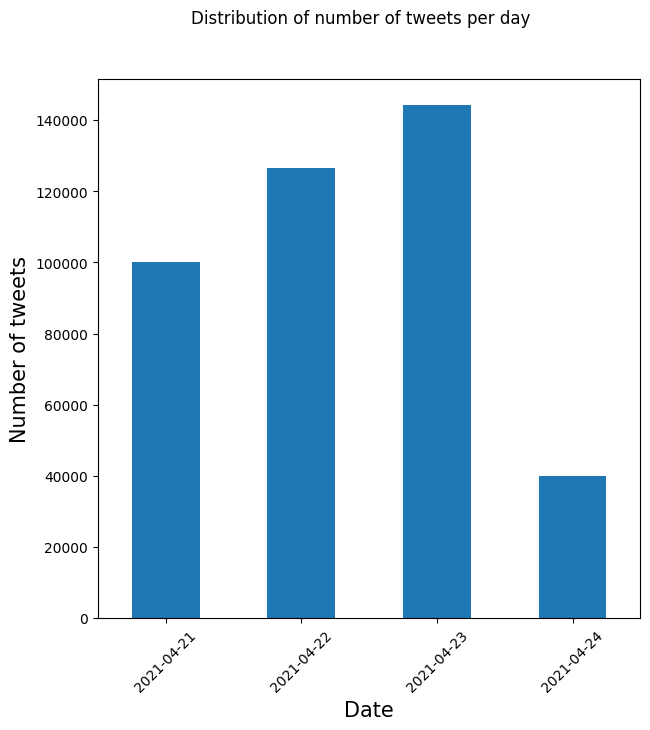

In [23]:
plt.figure(figsize=(7,7))

ax = df['date'].groupby([df['date'].dt.date]).count().plot(kind='bar')

ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of tweets', fontsize=15)

plt.suptitle('Distribution of number of tweets per day')
plt.xticks(rotation=45)
plt.show()

Identify most frequent hashtags

In [24]:
from ast import literal_eval

df_hashtags = df[['hashtags']]

#convert to list type
df_hashtags['hashtags'] = df_hashtags['hashtags'].apply(literal_eval)
# explode to separate the hashtags within the array
hashtag_counts = df_hashtags.explode('hashtags').value_counts()

# convert to dataframe
df_hashtag_counts = pd.DataFrame(hashtag_counts).reset_index()
df_hashtag_counts.columns = ['hashtag', 'count']
df_hashtag_counts.head()

C:\Users\tanka\AppData\Local\Temp\ipykernel_9144\3147223551.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hashtags['hashtags'] = df_hashtags['hashtags'].apply(literal_eval)


,hashtag,count
0,covid19,117078
1,coronavirus,11208
2,covid,8845
3,covidemergency2021,6968
4,india,5868


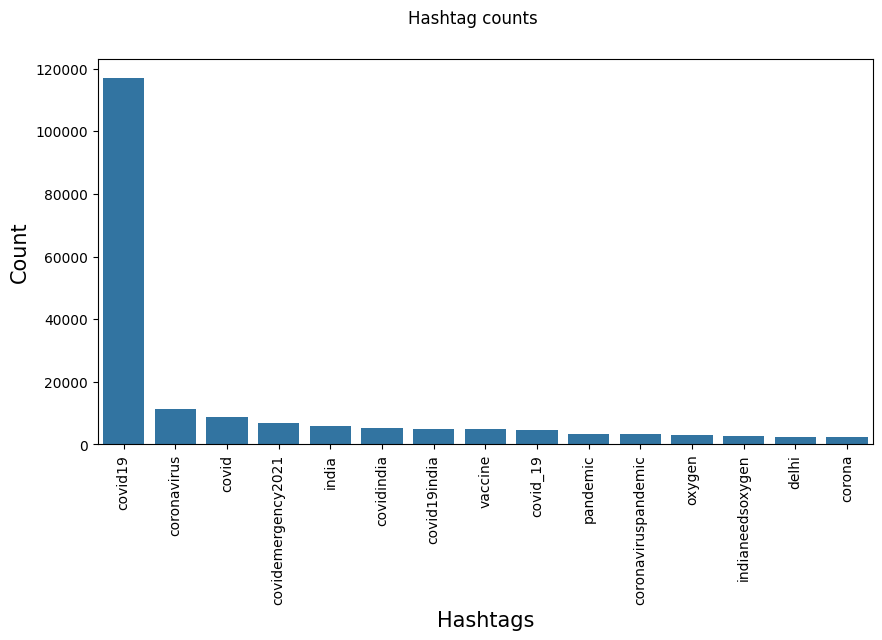

In [25]:
top_hashtags = 15
plt.figure(figsize=(10,5))

sns.barplot(data=df_hashtag_counts.iloc[0:top_hashtags], x='hashtag', y='count')
plt.xlabel('Hashtags', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.suptitle('Hashtag counts')
plt.xticks(rotation=90)
plt.show()

In [26]:
comment_words = ''

for val in df.tweet_no_stop:
    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += ' '.join(tokens) + ' '

<function matplotlib.pyplot.show(close=None, block=None)>

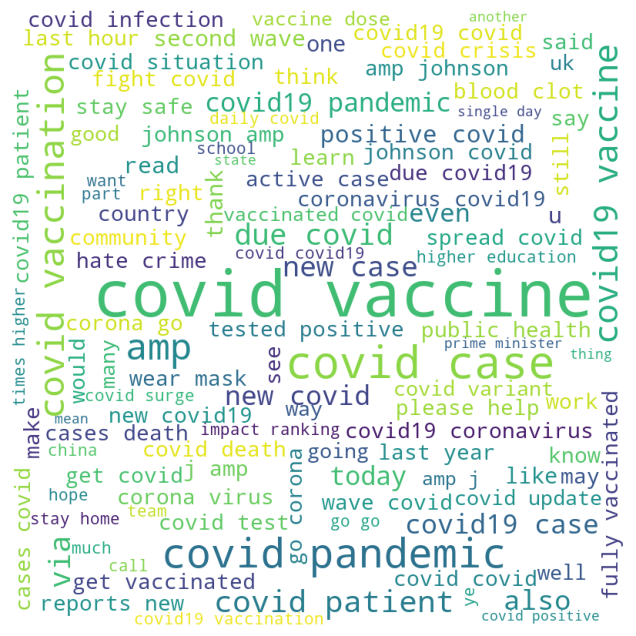

In [27]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800,
                background_color='white',
                stopwords=stopwords,
                min_font_size=15, 
                max_words=200).generate(comment_words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

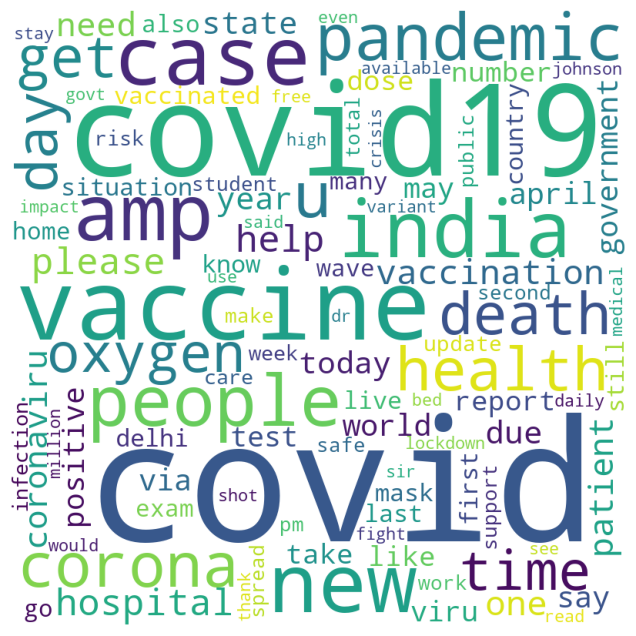

In [28]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800,
                background_color='white',
                stopwords=stopwords,
                min_font_size=15, 
                max_words=200, 
                collocations=False).generate(comment_words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')

plt.show

Identify topics causing negative and positive emotions in people using VADER sentiment analysis and visualise the results with word clouds.

In [29]:
analyzer = SentimentIntensityAnalyzer()

# function to get the sentiment scores for a given text
def sentiment_analyzer(x):
    return analyzer.polarity_scores(x)

def sentiment_Classification(x):
    if (x >= 0.05):
        return 'positive'
    elif (x > -0.05) and (x < 0.05):
        return 'neutral'
    elif x <= -0.05:
        return 'negative'


# get the sentiment of the tweet_cleaned
df['sentiment'] = df['tweet_cleaned'].apply(sentiment_analyzer)

# extract compound score to its own column
df['compound_score'] = df['sentiment'].apply(lambda x: x['compound'])

df['sentiment_category'] = df['compound_score'].apply(sentiment_Classification)

df.head()


,id,date,time,tweet,replies_count,retweets_count,likes_count,hashtags,tweet_cleaned,tweet_no_stop,sentiment,compound_score,sentiment_category
1,1.385880e+18,2021-04-24,8:43:17,The latest The Zika Advice Paper! https://t.c...,0.0,0.0,0.0,"['covid19', 'amr']",The latest The Zika Advice Paper Thanks to #co...,latest zika advice paper thanks #covid19 #amr,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.4404,positive
3,1.385880e+18,2021-04-24,8:43:16,https://t.co/4rdhSH3IYl Prime Minister @Nare...,0.0,0.0,0.0,['covid_19'],Prime Minister on Saturday said that like last...,prime minister saturday said like last year pr...,"{'neg': 0.042, 'neu': 0.769, 'pos': 0.188, 'co...",0.4215,positive
5,1.385880e+18,2021-04-24,8:43:16,Covid-19: India is going through very terrible...,0.0,0.0,0.0,"['presssangharsh', 'dailynews', 'news', 'india...",Covid 19 India is going through very terrible ...,covid 19 india going terrible situation says d...,"{'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'comp...",-0.5256,negative
6,1.385880e+18,2021-04-24,8:43:15,@CPBlr @KamalPantIPS speaks to me on the rules...,0.0,0.0,0.0,['covid19'],speaks to me on the rules that people will hav...,speaks rules people follow volunteers bengalur...,"{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp...",0.6808,positive
7,1.385880e+18,2021-04-24,8:43:14,@Physio_voice @BiswabhusanHC @ysjagan @Audimul...,0.0,0.0,0.0,[],voice Namaste sir we are the NTRUHS Physiother...,voice namaste sir ntruhs physiotherapy student...,"{'neg': 0.089, 'neu': 0.911, 'pos': 0.0, 'comp...",-0.3612,negative


In [30]:
df_pos = df[['tweet_no_stop', 'sentiment_category']].copy()
df_pos = df_pos[df_pos['sentiment_category'] == 'positive']

df_neg = df[['tweet_no_stop', 'sentiment_category']].copy()
df_neg = df_neg[df_neg['sentiment_category'] == 'negative']

In [31]:
print(df_pos.shape)
print(df_neg.shape)

(172655, 2)
(131298, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

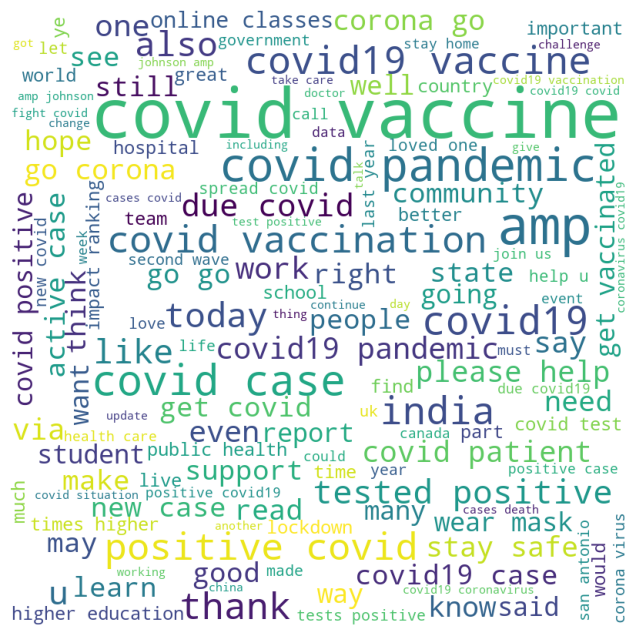

In [32]:
pos_words = ''

for val in df_pos.tweet_no_stop:
    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    pos_words += ' '.join(tokens) + ' '


pos_wordcloud = WordCloud(width=800, height=800,
                background_color='white',
                stopwords=stopwords,
                min_font_size=15, 
                max_words=200).generate(pos_words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(pos_wordcloud)
plt.axis('off')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

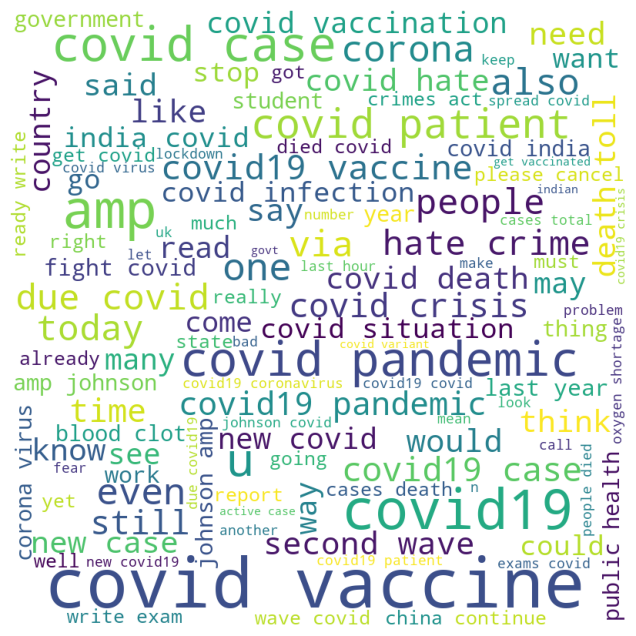

In [33]:
neg_words = ''

for val in df_neg.tweet_no_stop:
    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    neg_words += ' '.join(tokens) + ' '


neg_wordcloud = WordCloud(width=800, height=800,
                background_color='white',
                stopwords=stopwords,
                min_font_size=15, 
                max_words=200).generate(neg_words)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(neg_wordcloud)
plt.axis('off')

plt.show

#### Task 2: Examine the correlation between the emotional intensity of tweets and their virality


Create a new dataframe with `replies_count`, `retweets_count`, `likes_count` and `compound_score`.    
      
Calculate `viral_score` using this formula:    
Viral score = 0.6 x (number of retweets) + 0.2 x (number of likes) + 0.2 x (number of replies)

In [93]:
# initialise dataframe to investigate virality
df_virality = df[['replies_count', 'retweets_count', 'likes_count', 'compound_score']].copy()

# calculate virality score 
df_virality['viral_score'] = (df['replies_count']*0.25) + (df['likes_count']*0.25) + (df['retweets_count']*0.50)

df_virality.head()

,replies_count,retweets_count,likes_count,compound_score,viral_score
1,0.0,0.0,0.0,0.4404,0.0
3,0.0,0.0,0.0,0.4215,0.0
5,0.0,0.0,0.0,-0.5256,0.0
6,0.0,0.0,0.0,0.6808,0.0
7,0.0,0.0,0.0,-0.3612,0.0


In [94]:
df_virality[['compound_score', 'viral_score']].describe()

,compound_score,viral_score
count,411208.000000,411208.000000
mean,0.055821,5.822674
std,0.471402,139.194190
min,-0.997700,0.000000
25%,-0.273200,0.000000
50%,0.000000,0.250000
75%,0.421500,1.250000
max,0.994200,50101.500000


Plot sentiment compound score against viral score

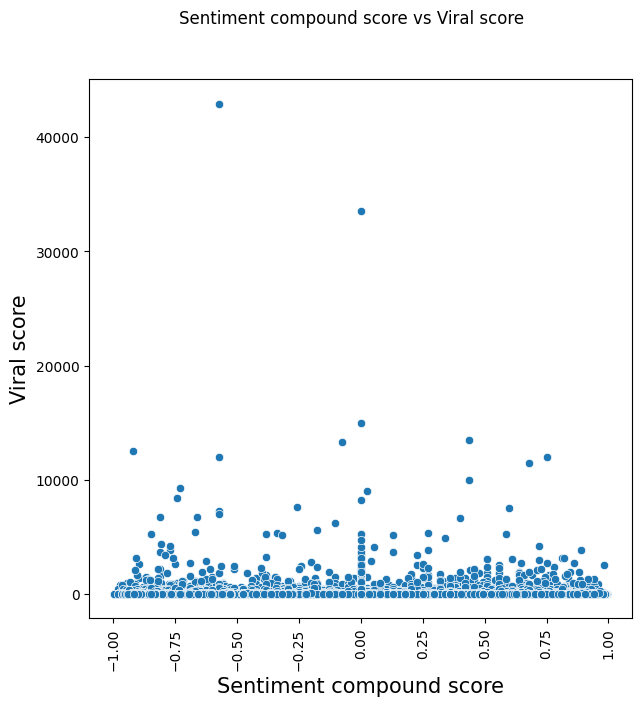

In [85]:
plt.figure(figsize=(7,7))

ax = sns.scatterplot(data=df_virality, x='compound_score', y='viral_score')

ax.set_xlabel('Sentiment compound score', fontsize=15)
ax.set_ylabel('Viral score', fontsize=15)

plt.suptitle('Sentiment compound score vs Viral score')
plt.xticks(rotation=90)
plt.show()

Use InterQuartile Range method to identify and remove outliers and plot the scatterplot of sentiment compound score against viral score.

In [95]:
# IQR 
Q3 = df_virality['viral_score'].quantile(0.75)
Q1 = df_virality['viral_score'].quantile(0.25)

IQR = Q3 - Q1

higher_bound = Q3 + (IQR * 1.5)
lower_bound = Q1 - (IQR * 1.5)

df_virality = df_virality[df_virality['viral_score'] < higher_bound] 
df_virality = df_virality[df_virality['viral_score'] > lower_bound]


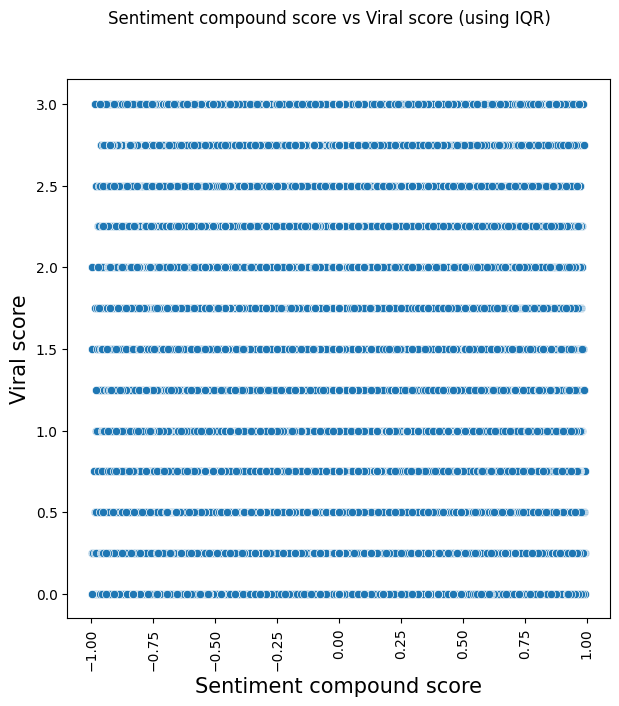

In [96]:
plt.figure(figsize=(7,7))

ax = sns.scatterplot(data=df_virality, x='compound_score', y='viral_score')

ax.set_xlabel('Sentiment compound score', fontsize=15)
ax.set_ylabel('Viral score', fontsize=15)

plt.suptitle('Sentiment compound score vs Viral score (using IQR)')
plt.xticks(rotation=90)
plt.show()